In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install scanpy
!pip install anndata
!pip install leidenalg
!pip install louvain
!pip install pynndescent

import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np

<head>
    <h1>
        Anndata Preprocessing
    </h1>
</head>

In [3]:
barcodes_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/barcodes.tsv",header=None)
genes_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/genes.tsv",header=None,sep="\t")
adata=sc.read_mtx("/content/drive/MyDrive/Colab Notebooks/matrix.mtx").T

In [4]:
#細胞のバーコードデータ
barcodes_df=barcodes_df.rename(columns={0:"barcodes"})
barcodes_df

,barcodes
0,AAACATACAACCAC-1
1,AAACATTGAGCTAC-1
2,AAACATTGATCAGC-1
3,AAACCGTGCTTCCG-1
4,AAACCGTGTATGCG-1
...,...
2695,TTTCGAACTCTCAT-1
2696,TTTCTACTGAGGCA-1
2697,TTTCTACTTCCTCG-1
2698,TTTGCATGAGAGGC-1


In [5]:
#遺伝子IDとシンボルのデータ
genes_df=genes_df.rename(columns={0:"GeneID", 1:"Symbol"})
genes_df

,GeneID,Symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
32733,ENSG00000215635,AC145205.1
32734,ENSG00000268590,BAGE5
32735,ENSG00000251180,CU459201.1
32736,ENSG00000215616,AC002321.2


In [6]:
#adata.obsのindexをbarcodesに変更
adata.obs_names=barcodes_df["barcodes"].values.copy()
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [7]:
#adata.varのindexをSymbolに変更し、GeneIDを追加
genes_df_ids=genes_df.drop("Symbol",axis=1).copy()
adata.var=genes_df_ids
adata.var_names=genes_df["Symbol"].values.copy()
adata.var

,GeneID
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [8]:
#前処理①
adata.var_names_make_unique() #遺伝子を一意にする
adata.var["mt"]=adata.var_names.str.startswith("MT-") #ミトコンドリア遺伝子かどうか
sc.pp.filter_cells(adata, min_genes=200) #発現遺伝子数が200未満の細胞を除外
sc.pp.filter_genes(adata, min_cells=3) #発現細胞数が3未満の遺伝子を除外
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True) #複数のqc指標を取得
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'GeneID', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

<head>
    <h1>
        Viewing and Clustering
    </h1>
</head>

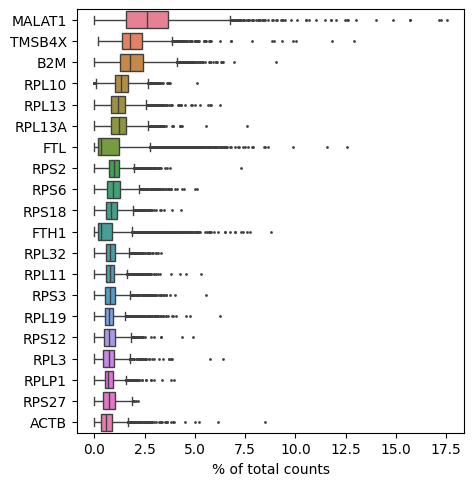

In [9]:
#各細胞のリードに対して占める割合が最も高い遺伝子をプロット
sc.pl.highest_expr_genes(adata, n_top=20)

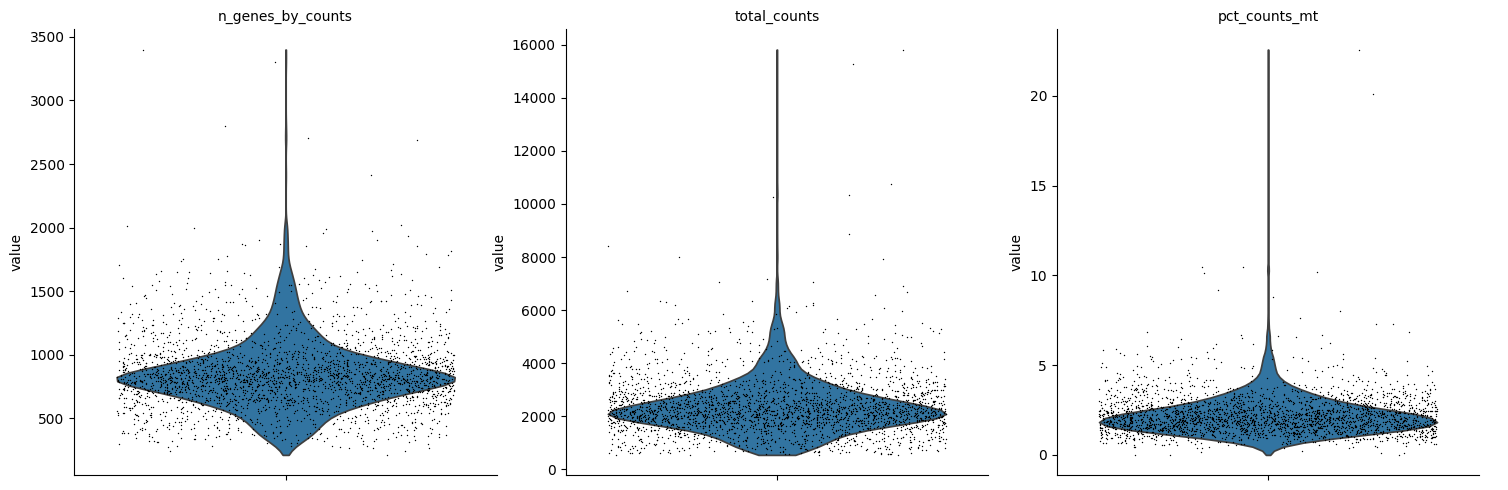

In [10]:
#violinプロット
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

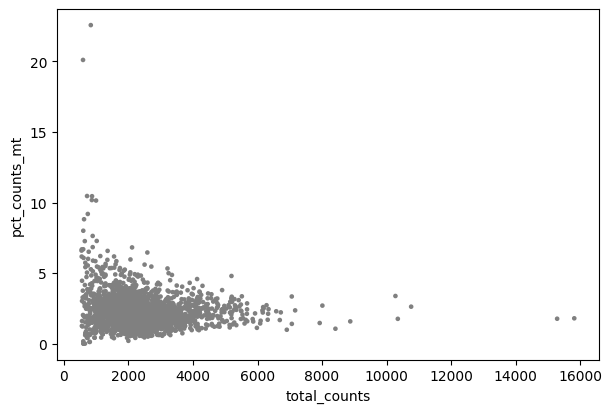

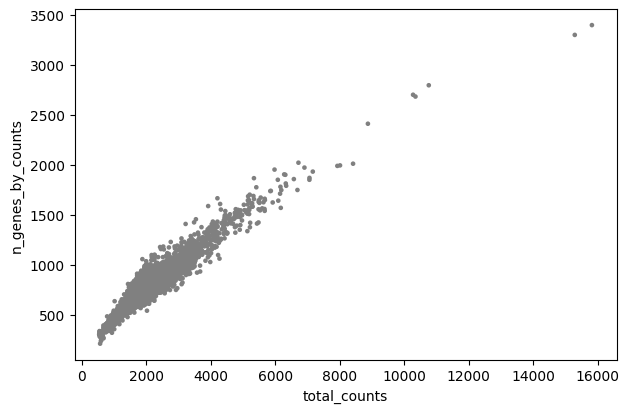

In [11]:
#scatterプロット
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [12]:
#前処理②＋highly_variable_genesの検出
adata=adata[adata.obs.n_genes_by_counts<2500, :] #遺伝子で発現している遺伝子数が2500以上の細胞を削除
adata=adata[adata.obs.pct_counts_mt<5, :] #ミトコンドリア遺伝子が5％以上の細胞を除外
sc.pp.normalize_total(adata, target_sum=10000) #各細胞の合計遺伝子発現量を10000に正規化
sc.pp.log1p(adata) #対数化
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #highly_variable_genesを検出

adata

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'GeneID', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

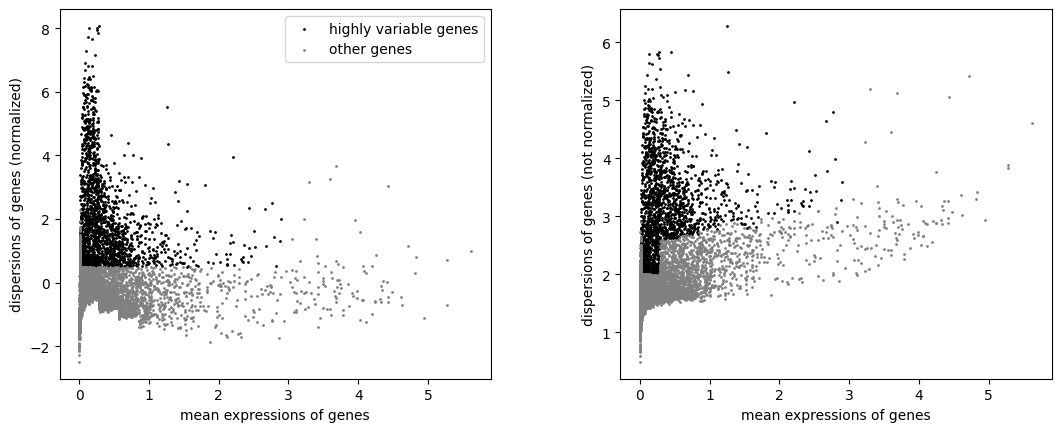

In [13]:
#highly_variable_genesをプロット（左が正規化後、右が正規化前）
sc.pl.highly_variable_genes(adata)

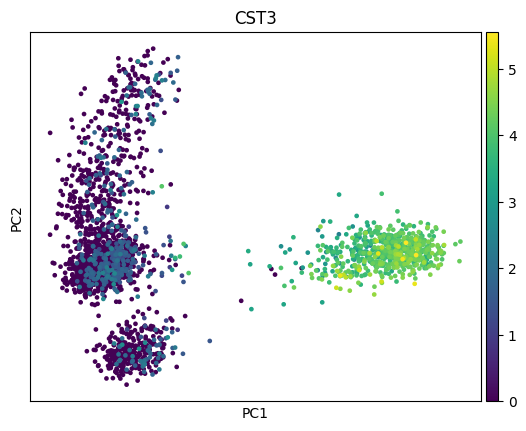

In [14]:
#PCA
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca(adata, color="CST3")

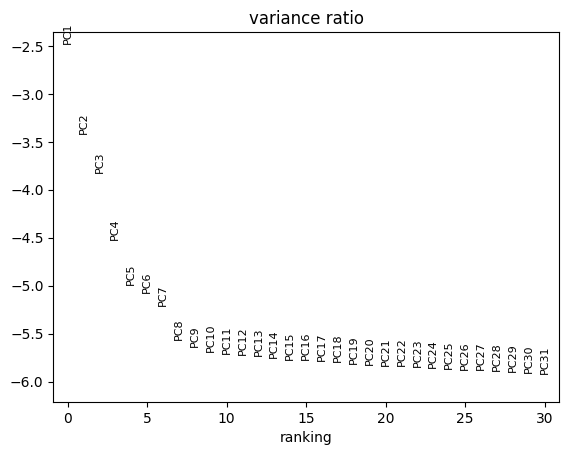

In [15]:
#主成分寄与率をプロット
sc.pl.pca_variance_ratio(adata, log=True)

In [16]:
#PCAデータから近傍グラフを作成
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40, method="umap")

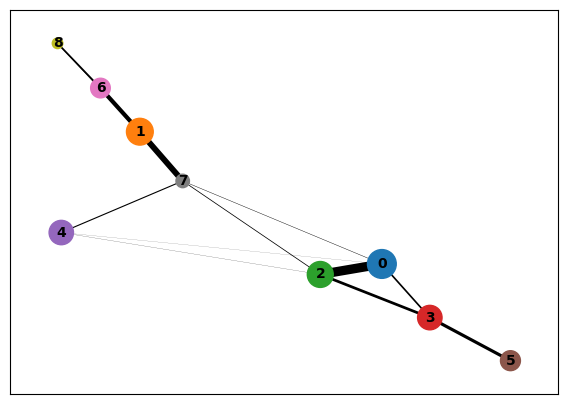

In [17]:
#louvain法でクラスタリングし、PAGAの実行とプロット
sc.tl.louvain(adata)
sc.tl.paga(adata, groups="louvain")
sc.pl.paga(adata, node_size_scale=2, edge_width_scale=1)

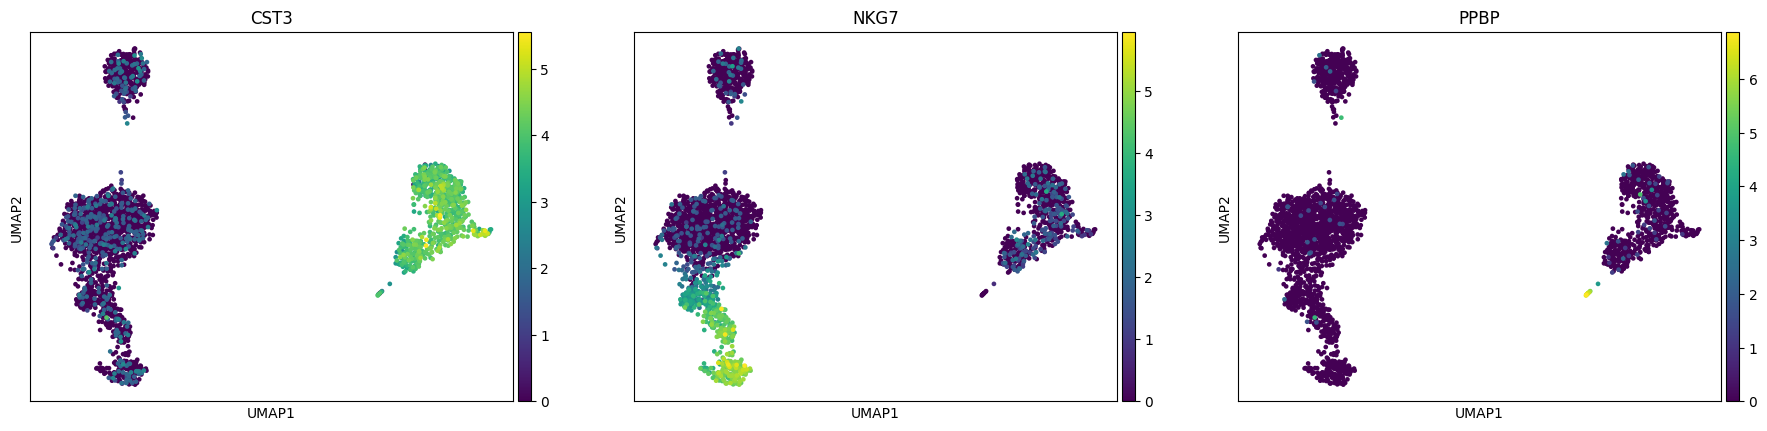

In [18]:
#umapでの次元削減とプロット
sc.tl.umap(adata)
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"])

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


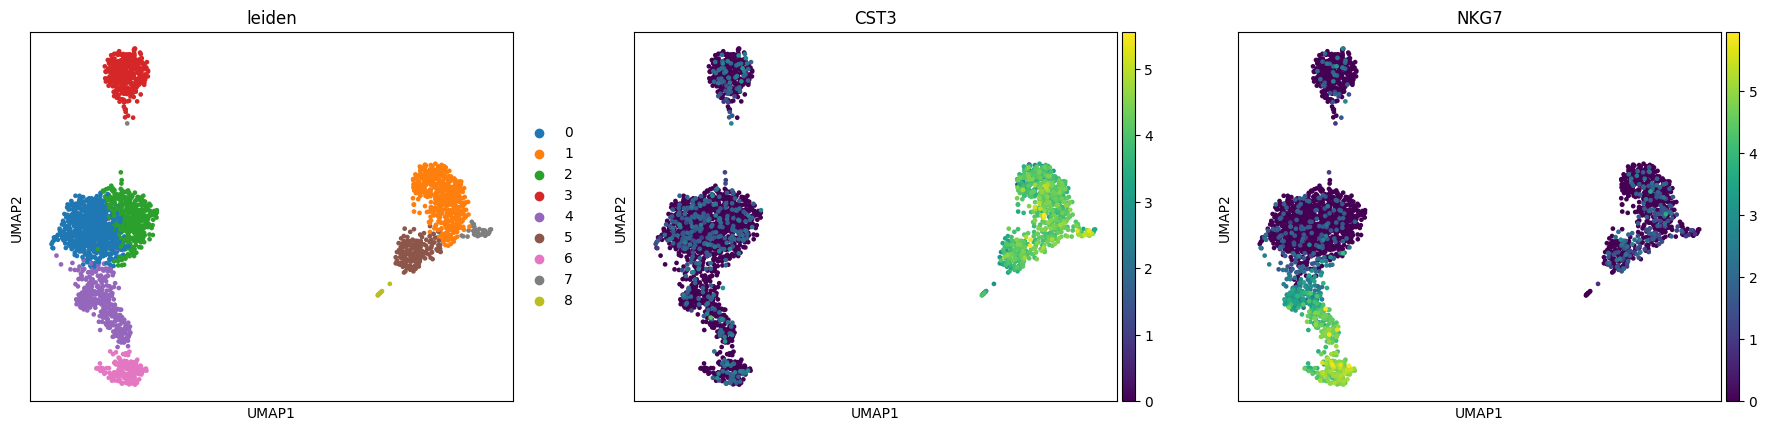

In [19]:
#leiden法でクラスタリングして再度プロット
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden" ,"CST3", "NKG7"])

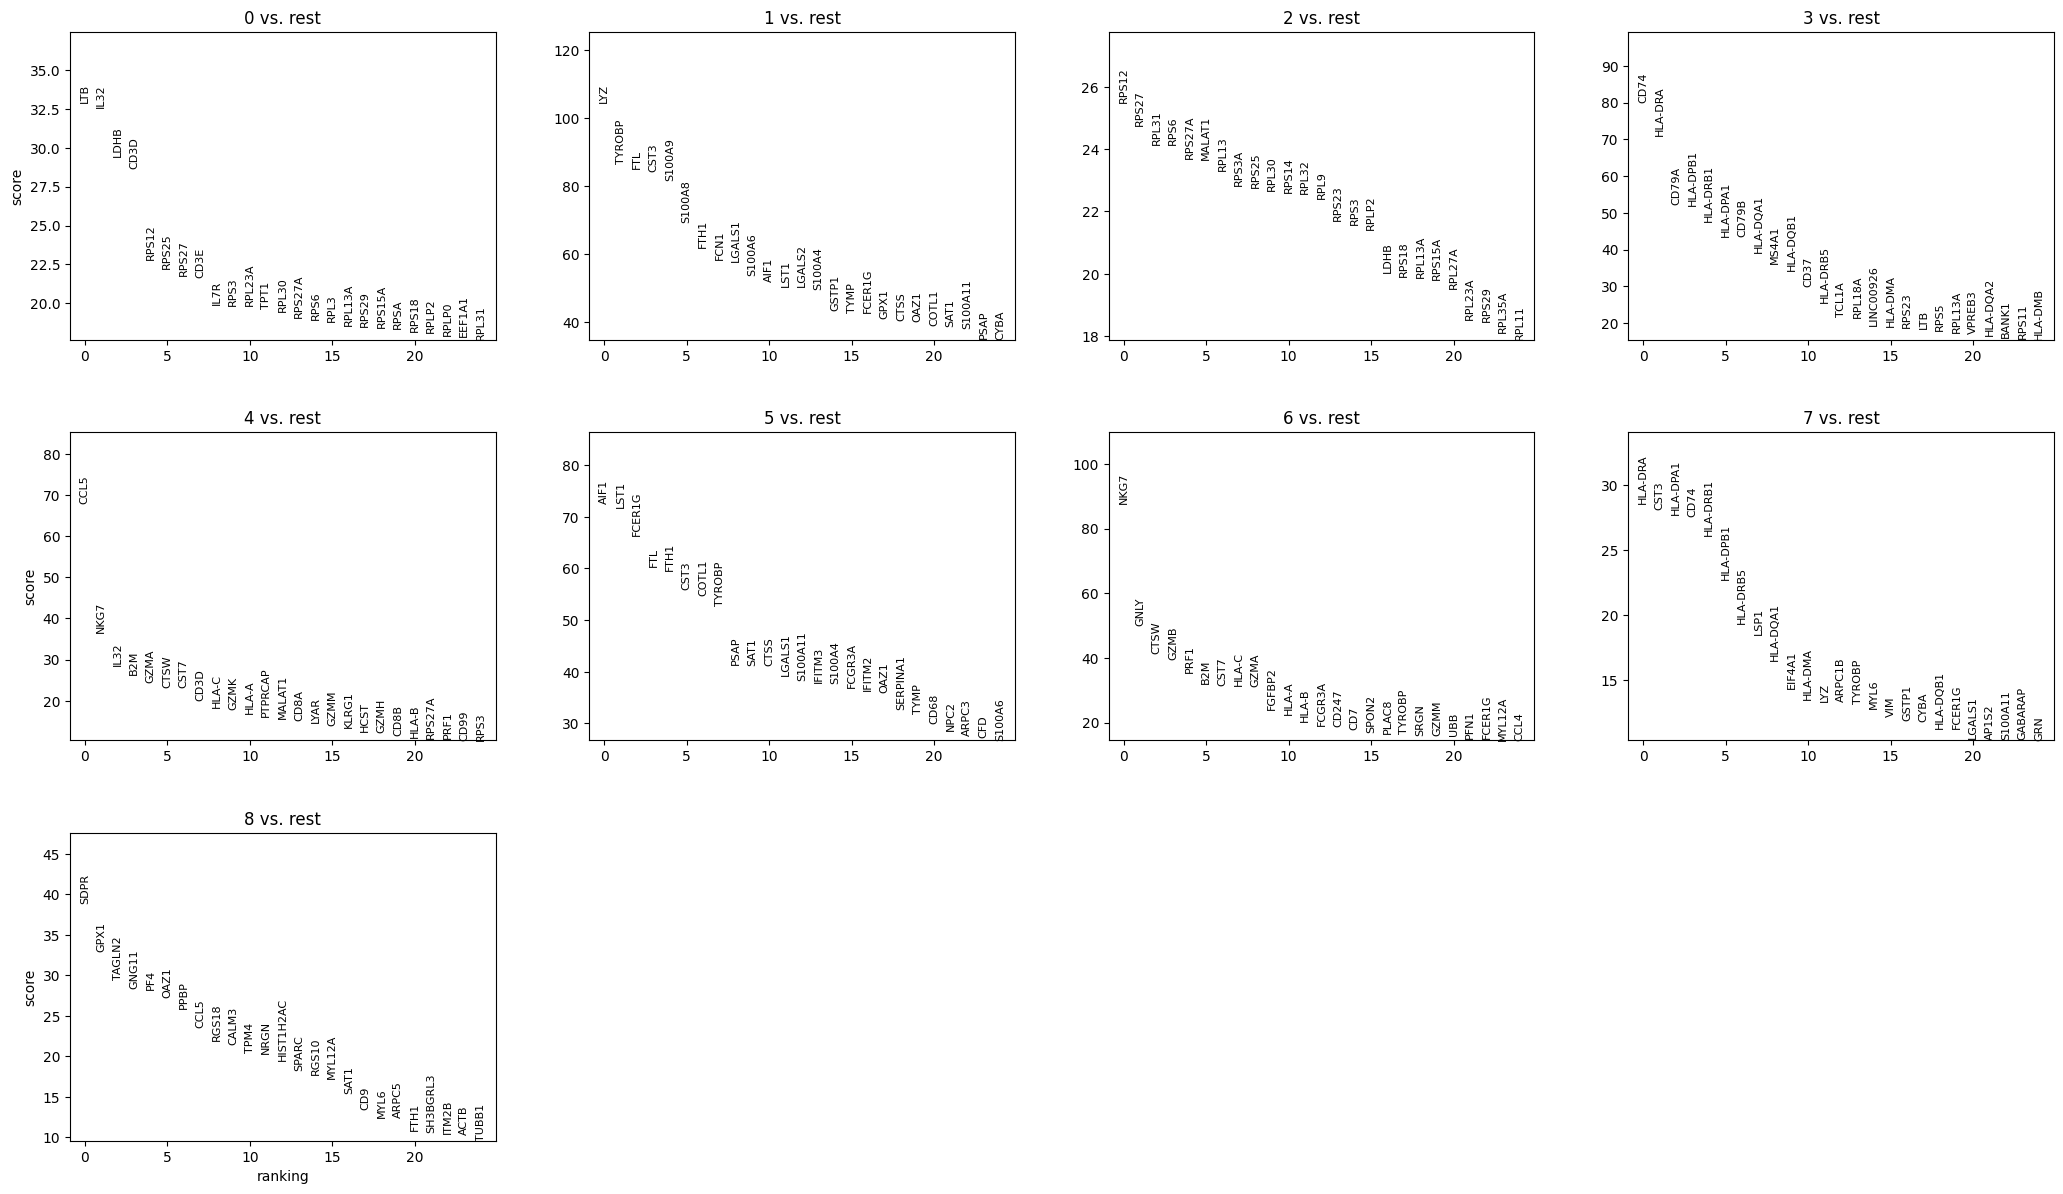

In [20]:
#各クラスター内の発現変動遺伝子のランキング
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


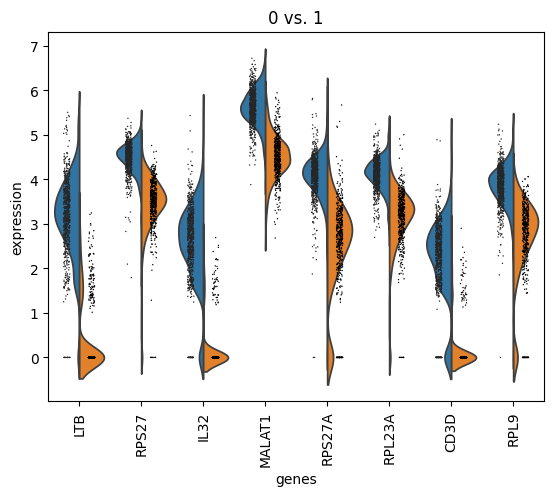

In [21]:
#クラスタ0と1を比較
sc.tl.rank_genes_groups(adata, "leiden",groups=[0], reference="1", method="wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups="0" , n_genes=8)

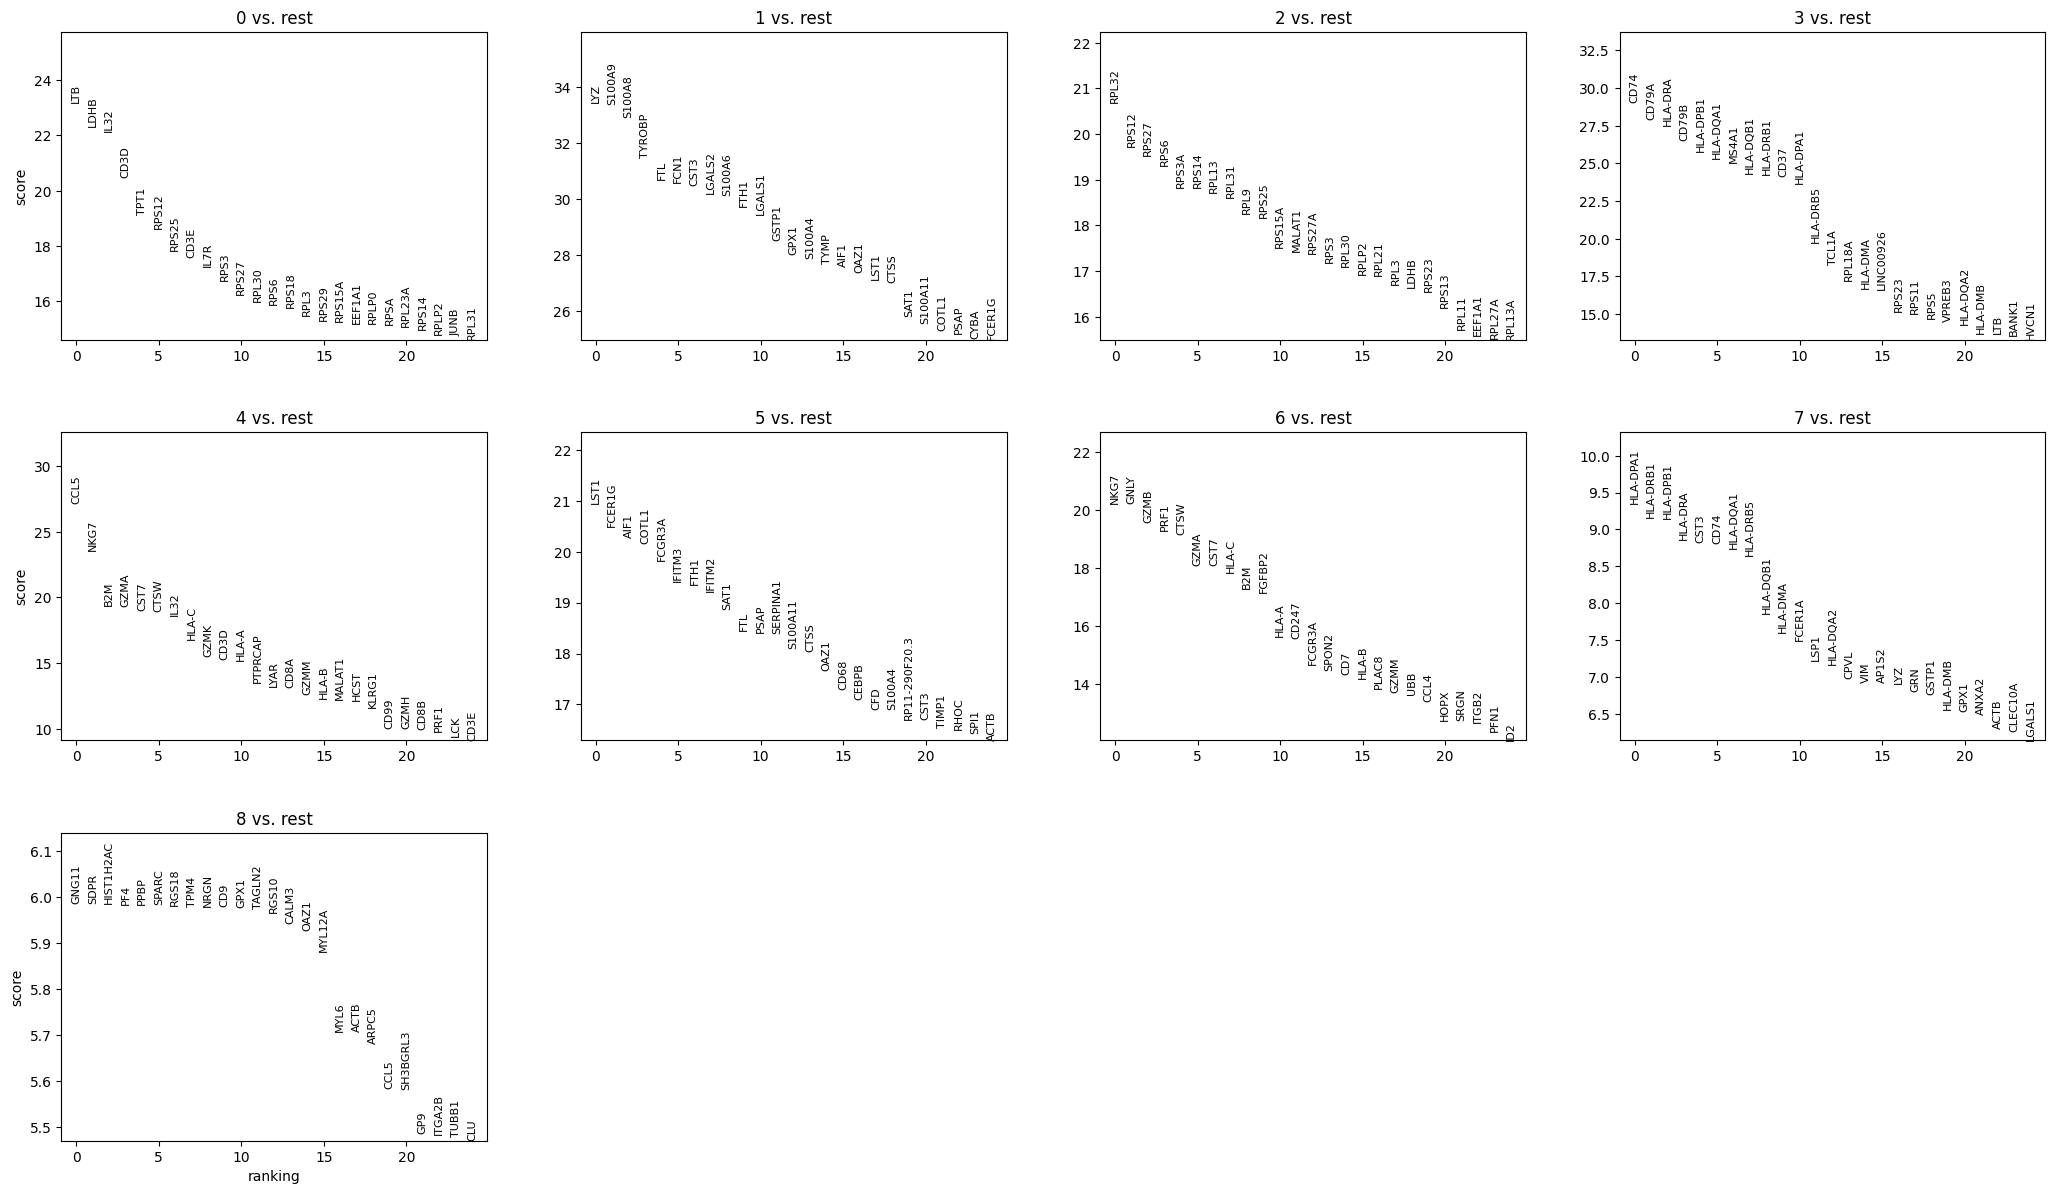

In [22]:
#1対他でクラスタを比較
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

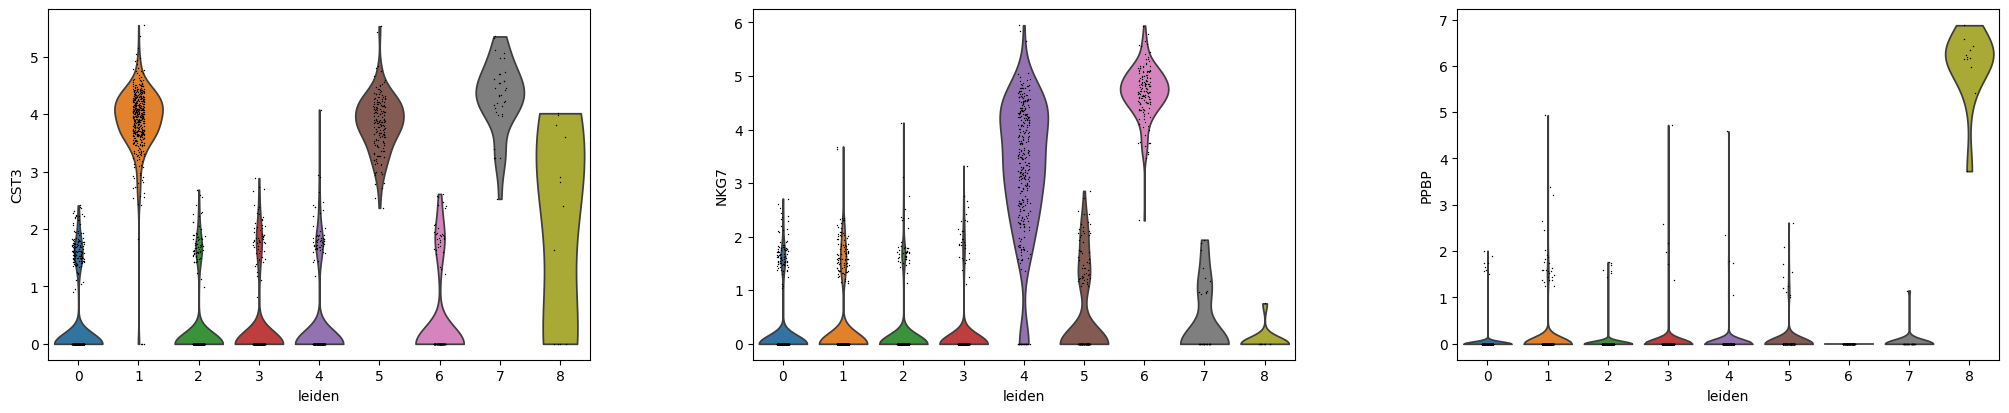

In [23]:
#クラスタ間の遺伝子発現量をプロット
sc.pl.violin(adata, ["CST3", "NKG7", "PPBP"], groupby="leiden")

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


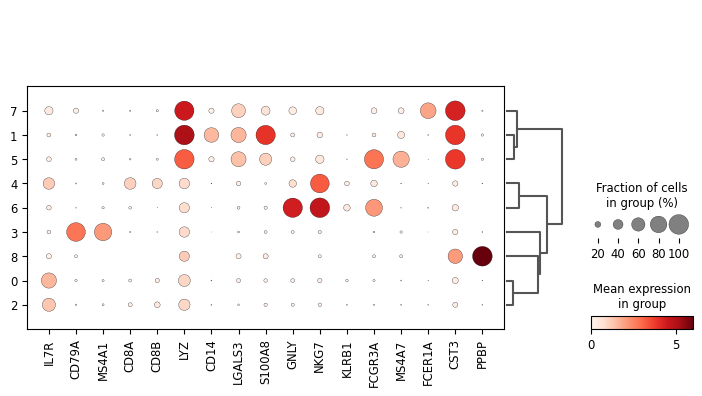

In [24]:
#marker_genesについて、クラスタ間での平均発現量
marker_genes=["IL7R", "CD79A", "MS4A1", "CD8A", "CD8B", "LYZ", "CD14",
              "LGALS3", "S100A8", "GNLY", "NKG7", "KLRB1",
              "FCGR3A", "MS4A7", "FCER1A", "CST3", "PPBP"]

sc.pl.dotplot(adata, marker_genes, groupby="leiden", dendrogram=True)

In [25]:
#データフレームに変換して表示
adata.to_df()

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.745718,1.635873,0.0,2.864242,0.0,0.000000,0.000000,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.223994,1.111715,0.0,2.851662,0.0,1.111715,0.000000,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.354503,1.995416,0.0,2.618163,0.0,0.000000,0.000000,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.566387,2.515108,2.149274,0.0,2.149274,0.0,0.000000,0.000000,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,3.063772,0.0,2.416278,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.358668,0.000000,0.0,1.358668,0.0,0.000000,0.000000,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.362115,1.918229,1.362115,0.0,2.535106,0.0,0.000000,0.000000,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.751096,0.000000,0.0,3.208945,0.0,0.000000,0.000000,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.378132,0.000000,0.000000,0.0,2.378132,0.0,0.000000,2.378132,0.0,0.0


In [26]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'leiden'
    var: 'GeneID', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [27]:
adata.var.describe()

,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,means,dispersions,dispersions_norm
count,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,1.371400e+04,13713.000000,13714.000000
mean,166.470468,166.470468,0.172479,93.834427,465.693298,2.345693e-01,1.876410,0.000073
std,345.630756,345.630756,1.310461,12.801139,3538.244141,4.578156e-01,0.618141,0.999307
min,3.000000,3.000000,0.001111,0.000000,3.000000,1.000000e-12,0.485645,-2.494548
25%,15.000000,15.000000,0.005926,94.185185,16.000000,2.486821e-02,1.565342,-0.484613
50%,54.000000,54.000000,0.021111,98.000000,57.000000,8.698730e-02,1.672866,-0.233057
75%,157.000000,157.000000,0.065463,99.444444,176.750000,2.447175e-01,1.890471,0.077580
max,2700.000000,2700.000000,59.883335,99.888889,161685.000000,5.622219e+00,6.286001,8.074296


In [28]:
adata.obs.describe()

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
count,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000
mean,850.086808,848.647460,2371.069092,49.808567,2.116568
std,263.373564,262.760302,990.158752,28.865978,0.843089
min,212.000000,212.000000,556.000000,0.000000,0.000000
25%,700.000000,699.000000,1779.250000,31.000000,1.520267
50%,820.000000,819.000000,2213.000000,44.000000,2.010702
75%,955.750000,954.000000,2766.750000,61.000000,2.591085
max,2455.000000,2413.000000,8875.000000,249.000000,4.993834
